# **Data Science for Finance** <p>
**by: @Alexander Alves** - [Linkedin](https://www.linkedin.com/in/alexander77alves/) <p>

# **About the dataset** <p>
"Unicorn" is a term used in the venture capital industry to describe a privately held startup worth more than $1 billion. The term was first popularized by venture capitalist Aileen Lee, founder of Cowboy Ventures, a venture capital based in Palo Alto, California.

Unicorns can also refer to a recruitment phenomenon in the human resources (HR) industry. HR managers can have high expectations for filling a role, leading them to look for candidates with higher qualifications than what is required for a specific role. In essence, these managers are looking for a unicorn, which leads to a disconnect between their ideal candidate and who they can hire from the pool of available people.

[Download the database](https://www.kaggle.com/ramjasmaurya/unicorn-startups)


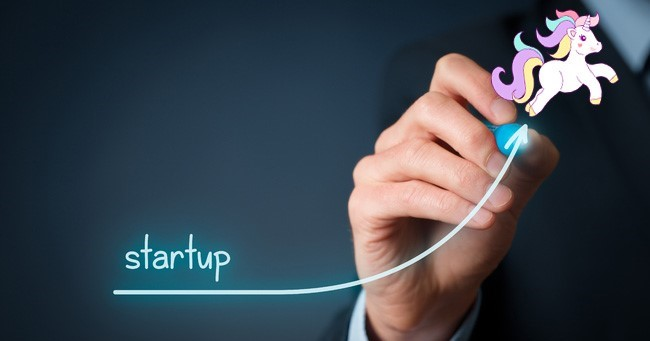

In [58]:
# Import the libs
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [59]:
# Read the data
Database = pd.read_csv('Startups in 2021 end.csv')

# Check Dimension
Database.shape

(936, 8)

In [60]:
Database.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [61]:
# Columns
Database.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [62]:
# Rename the column Unnamed for Id
Database.rename( columns={
    'Unnamed: 0' : 'Id',
}, inplace=True )

In [63]:
# Check Information Type
Database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [64]:
Database.isnull()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False
933,False,False,False,False,False,False,False,False
934,False,False,False,False,False,False,False,False


In [65]:
Database.isnull().sum()

Id                   0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

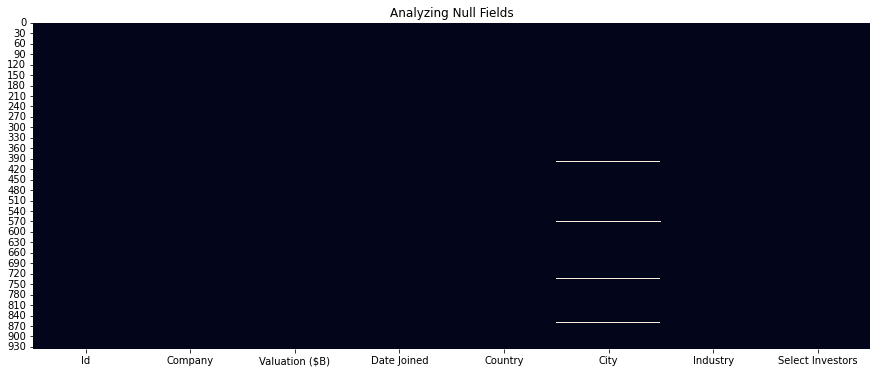

In [66]:
# Print shop
plt.figure( figsize=(15,6) )
plt.title('Analyzing Null Fields')
sns.heatmap( Database.isnull(), cbar=False );

In [67]:
# Unique fields
Database.nunique()

Id                  936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
dtype: int64

In [68]:
Database['Industry'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [69]:
# Unique Values = Rank
Database['Industry'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Industry, dtype: int64

In [70]:
# Unique Values = Rank
Database['Industry'].value_counts( normalize=True )

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

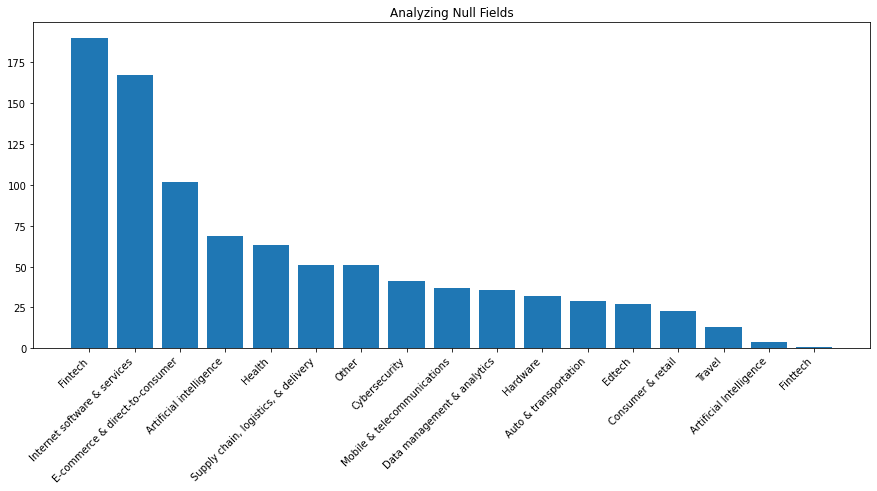

In [71]:
plt.figure( figsize=(15,6) )
plt.title('Analyzing Null Fields')
plt.bar( Database['Industry'].value_counts().index, Database['Industry'].value_counts() )
plt.xticks( rotation=45, ha='right' );

In [72]:
Database['Country'].value_counts()

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [73]:
Analysis = round(Database['Country'].value_counts( normalize=True ) * 100)

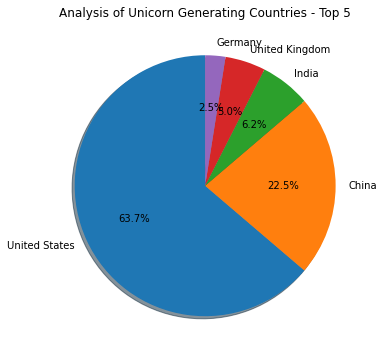

In [74]:
# General Plot of Countries
plt.figure( figsize=(15,6) )
plt.title('Analysis of Unicorn Generating Countries - Top 5')
plt.pie( 
    Analysis.head(5),
    labels = Analysis.index[0:5],
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
    );

In [75]:
# Conversion to Date
Database['Date Joined'] = pd.to_datetime(Database['Date Joined'])
Database['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [76]:
# Extract Year and Month
Database['Month'] = pd.DatetimeIndex(Database['Date Joined']).month
Database['Year'] = pd.DatetimeIndex(Database['Date Joined']).year
Database.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [77]:
# Analytical Table
Clustered_Analysis = Database.groupby( by = ['Country', 'Year', 'Month', 'Company' ] ).count()['Id'].reset_index()
Clustered_Analysis

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [78]:
Clustered_Analysis.loc[ Clustered_Analysis['Country'] == 'Brazil' ]

,Country,Year,Month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [79]:
Clustered_Analysis.loc[ Clustered_Analysis['Country'] == 'United States' ]

,Country,Year,Month,Company,Id
457,United States,2011,4,Vice Media,1
458,United States,2012,6,Fanatics,1
459,United States,2012,12,Avant,1
460,United States,2012,12,SpaceX,1
461,United States,2013,2,Mu Sigma,1
...,...,...,...,...,...
929,United States,2021,12,Iodine Software,1
930,United States,2021,12,Jokr,1
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1


In [80]:
# Transformando a coluna valor
Database['Valuation ($B)'] = pd.to_numeric( Database['Valuation ($B)'].apply( lambda Line: Line.replace('$', '') ) )

Database.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [81]:
# Tabela Analitíca
Country_Analysis = Database.groupby( by = ['Country'] ).sum()['Valuation ($B)'].reset_index()

Country_Analysis.head()

,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [82]:
Analyze_Value = Country_Analysis.sort_values('Valuation ($B)', ascending = False)
Analyze_Value.head()

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


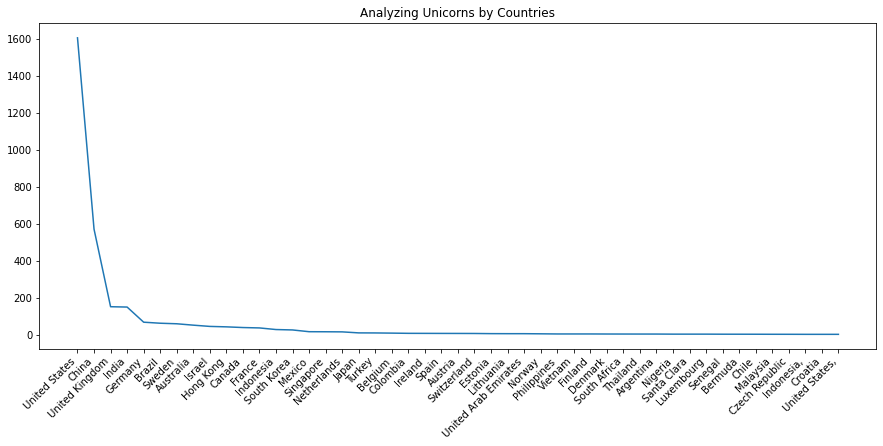

In [83]:
plt.figure( figsize=(15,6) )
plt.title('Analyzing Unicorns by Countries')
plt.xticks( rotation=45, ha='right' );
plt.plot( Analyze_Value['Country'], Analyze_Value['Valuation ($B)'] );